In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Realtime_NN.csv', header=None)
df

,0,1,2,3,4,5
0,3.295837,0.150577,NaN,NaN,NaN,NaN
1,3.295898,0.172088,NaN,NaN,NaN,NaN
2,3.295959,0.236621,NaN,NaN,NaN,NaN
3,3.296021,0.232372,NaN,NaN,NaN,NaN
4,3.296082,0.185632,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7096,6.493408,-0.084716,NaN,NaN,NaN,NaN
7097,6.493469,-0.086575,NaN,NaN,NaN,NaN
7098,6.493530,-0.071969,NaN,NaN,NaN,NaN
7099,6.493591,-0.010357,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=[2, 3, 4, 5])
df.columns = ['X', 'Y']
print(df)

             X         Y
0     3.295837  0.150577
1     3.295898  0.172088
2     3.295959  0.236621
3     3.296021  0.232372
4     3.296082  0.185632
...        ...       ...
7096  6.493408 -0.084716
7097  6.493469 -0.086575
7098  6.493530 -0.071969
7099  6.493591 -0.010357
7100  6.493652  0.067454

[7101 rows x 2 columns]


<AxesSubplot:xlabel='X', ylabel='Y'>

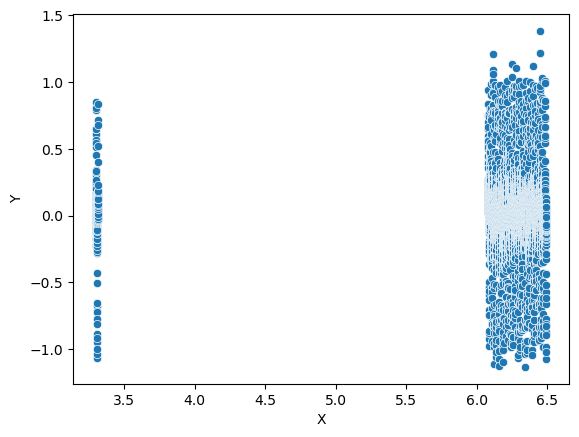

In [4]:
sns.scatterplot(x=df['X'],y=df['Y'])

In [5]:
# Split data into X (input) and Y (output)
X = df[['X']].values.reshape(-1, 1)
X

array([[3.2958374 ],
       [3.29589844],
       [3.29595947],
       ...,
       [6.49353027],
       [6.49359131],
       [6.49365234]])

In [6]:
Y = df['Y'].values
Y

array([ 0.15057704,  0.17208803,  0.23662105, ..., -0.07196891,
       -0.01035715,  0.06745426])

In [7]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Build and train the KNN model
k = 3  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
# Predict on the test set
Y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.006994323164925935


In [14]:
result_df = pd.DataFrame({'X_test': X_test.flatten(), 'Y_test': Y_test, 'Y_pred': Y_pred})
result_df

,X_test,Y_test,Y_pred
0,6.432251,0.010888,0.008498
1,6.331726,0.023901,0.062143
2,6.345764,0.184570,0.215641
3,6.355225,-0.718627,-0.637629
4,6.291992,0.026291,-0.021777
...,...,...,...
1416,6.458313,-0.124286,-0.123932
1417,6.294006,0.093745,0.092506
1418,6.160950,0.123489,0.133669
1419,6.354431,-0.129597,-0.115522


In [15]:
# Perform prediction for new input values
new_input_values = [3.296264648, 3.296325684, 3.296386719]  # Example input values
new_predictions = knn_model.predict([[x] for x in new_input_values])

In [16]:
# Print the new predictions
for x, y_pred in zip(new_input_values, new_predictions):
    print(f"For input X = {x}, predicted f(X) = {y_pred}")

For input X = 3.296264648, predicted f(X) = 0.19713993866666668
For input X = 3.296325684, predicted f(X) = 0.26255818200000003
For input X = 3.296386719, predicted f(X) = 0.30018030599999995
